# **Clustering**

# **Introduction**

## **Overview**
In my ongoing exploration of data science methodologies, I've embarked on an intriguing journey to apply clustering techniques to specific segments of my datasets. My primary focus oscillates between the record data and the textual data, each presenting its unique set of challenges and opportunities. Through this clustering analysis, my aim is to unearth latent structures within the data. This is particularly crucial in my endeavors to understand the intricacies within the SEC-FDA dataset, where I am probing into how various financial indicators cluster around different types of FDA approvals. The insights gleaned from this exercise are expected to shed light on complex relationships and patterns that are not immediately visible in a cursory analysis.

## **Theory**

**K-Means Clustering**:
K-means is a popular method in machine learning used for dividing a set of data into groups, known as 'clusters'. The main goal of this method is to group data points so that points in the same cluster are more similar to each other than to those in other clusters. This is done by finding the central point, or 'centroid', of each cluster. K-means is well-liked because it's simple and works well, especially when you have a lot of data.

To start using K-means, you first decide on the number of clusters you want, which is called 'k'. Then the algorithm randomly picks 'k' points in the data as the starting centroids. After that, it follows two steps repeatedly: first, each data point is put into the cluster with the nearest centroid; second, the centroids are moved to the average location of all the points in their cluster. This process keeps going until the centroids don't move much anymore, which means the algorithm has done its job.

There are some challenges with K-means, though. It assumes that all clusters are round and about the same size, which might not be true for some data. Also, choosing the right number of clusters ('k') can be tricky. Techniques like the elbow method or silhouette analysis are often used to help find the best 'k'. Despite these issues, K-means is still a very useful tool and is widely used for grouping large amounts of data in different areas of machine learning.


**DBSCAN**:
DBSCAN, is a clustering algorithm in machine learning that excels in identifying clusters of varying shapes and densities. Unlike K-means, DBSCAN does not require the pre-specification of the number of clusters. Its primary focus is on the density of data points, making it particularly adept at handling data sets with irregularly shaped clusters and noise.

The operational mechanism of DBSCAN begins with selecting an arbitrary data point and examining its surrounding area to determine the density of neighboring points within a specified radius. If the number of points within this radius exceeds a defined threshold, DBSCAN treats these points as part of a cluster. The algorithm then iteratively expands this cluster by exploring each of the neighboring points and including additional dense points. Points that do not meet the density criteria are labeled as noise, meaning they do not belong to any cluster.

One of the significant advantages of DBSCAN is its ability to discover clusters of arbitrary shapes, a capability that linear clustering algorithms like K-means lack. This flexibility makes DBSCAN suitable for complex datasets where the cluster boundaries are not well-defined. Additionally, the algorithm's design inherently accommodates the detection and exclusion of outliers or noise from the clusters.

However, the effectiveness of DBSCAN is contingent on the appropriate selection of two key parameters: the radius of the neighborhood (often referred to as epsilon) and the minimum number of points required to form a dense region. The choice of these parameters can significantly influence the clustering outcome. A challenge arises in scenarios where the dataset exhibits clusters of varying densities, as a single parameter setting may not be optimal for all clusters.


**Hierarchical Clustering**:
Hierarchical clustering builds a hierarchy of clusters, either by successively merging smaller clusters into larger ones (agglomerative approach) or by splitting larger clusters into smaller ones (divisive approach). This method is particularly useful for understanding the data structure and identifying meaningful groupings at different levels of granularity.

In the agglomerative approach, which is more commonly used, each data point starts as its own cluster. The algorithm then repeatedly merges the closest pair of clusters until all points are united into a single cluster. This 'closeness' can be measured in various ways, such as the distance between the centroids of the clusters, the shortest distance between points in two clusters, or the average distance between all pairs of points in the clusters. The divisive approach works in the opposite manner, starting with all points in a single cluster and recursively splitting the largest cluster.

One of the key outputs of hierarchical clustering is a dendrogram, a tree-like diagram that illustrates the series of merges or splits and the level at which each merge or split occurred. The dendrogram is a valuable tool for visualizing the structure of the data and deciding on the number of clusters by 'cutting' the dendrogram at a desired level.

Hierarchical clustering is advantageous because it does not require the number of clusters to be specified in advance and provides a detailed view of how the clusters are related. This can be particularly useful for exploratory data analysis. However, it's computationally intensive, especially for large datasets, and the results can be sensitive to the choice of distance metric and linkage criteria.


## **Methods**
For the implementation of these clustering techniques, I relied heavily on Python and its powerful libraries, such as Scikit-learn for the clustering algorithms and Matplotlib for visualizations. My approach was methodical: I started by preprocessing the data, which involved normalizing and selecting relevant features. Following this, I applied each clustering algorithm in turn, making sure to document each step for clarity and reproducibility. 

In terms of model selection for these clustering techniques, I utilized the Elbow method and the Silhouette score. The Elbow method was particularly useful in K-Means to determine the optimal number of clusters by identifying the point where the sum of squared distances to centroids begins to plateau. The Silhouette score, on the other hand, helped me assess the quality of the clustering by measuring how similar a data point is to its own cluster compared to other clusters. A high Silhouette score indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. I also used the Silhouette score to compare the performance of different clustering algorithms.

# **Data Selection**

Here, I'll import data from my prior assignments and select the relevant features for clustering. The data has already been cleaned and normalized, so it'll be ready for clustering after feature selection and hyperparameter tuning.

In [2]:
import pandas as pd

df = pd.read_csv('../../data-exploration/outputs/model_normalized.csv')
df

,device_name,SEC_name,state,CIK,financial_year,advisory_committee_description,clearance_type,ConsolidatedRevenue,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic
0,TRUSS THORACOLUMBAR PLATE SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Orthopedic,Special,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
1,ZYFUSE FACET FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Unknown,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
2,XTEND ANTERIOR CERVICAL PLATE SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Orthopedic,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
3,MODIFICATION TO BEACON STABILIZATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Orthopedic,Special,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
4,CORRIDOR FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2009.0,Unknown,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,FemaSeed Intratubal Insemination,Femasys Inc.,GA,1339005,2023.0,Obstetrics/Gynecology,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
719,Venus Versa PRO System,Venus Concept Inc.,CA,1409269,2023.0,"General, Plastic Surgery",Special,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
720,Ulna Plating System,BIOMET INC,IN,351346,2016.0,Orthopedic,Traditional,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
721,AbbVie PEG,AbbVie Inc.,IL,1551152,2015.0,"Gastroenterology, Urology",Traditional,1.316360e+00,1.638768,0.993608,1.349973,0.719299,1.540321,1.589212e+00,0.620365,0.117582


In [3]:
df.describe()

,CIK,financial_year,ConsolidatedRevenue,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic
count,7.230000e+02,723.000000,7.230000e+02,723.000000,723.000000,723.000000,723.000000,723.000000,7.230000e+02,723.000000,723.000000
mean,9.451407e+05,2015.652835,-3.871103e-02,-0.004983,0.034798,-0.003742,-0.141119,0.029234,2.702348e-02,-0.020452,-0.005163
std,5.665200e+05,4.126440,8.474663e-01,0.797906,0.716739,0.833252,0.870974,0.749370,4.772783e-01,0.384344,0.329365
min,1.800000e+03,2009.000000,-2.942799e+00,-1.610041,-1.477914,-2.568054,-2.525445,-2.244824,-7.004983e-01,-0.386809,-1.585118
25%,5.385910e+05,2012.000000,-3.808990e-01,-0.483064,-0.417091,-0.464397,-0.548662,-0.398154,-3.253529e-01,-0.236238,-0.126924
50%,1.037760e+06,2015.000000,-3.157968e-16,0.018632,-0.040179,-0.054483,-0.484983,0.009416,-2.033996e-15,-0.205244,-0.009090
75%,1.351950e+06,2019.000000,5.605322e-01,0.411310,0.660008,0.542739,0.679241,0.471589,2.464611e-02,0.189469,0.044672
max,1.835567e+06,2023.000000,2.100329e+00,2.575791,2.339357,1.983428,2.091360,2.012745,2.567271e+00,2.357545,1.300339


ResearchAndDevelopmentExpense: This is a crucial feature that directly relates to R&D efforts. It could be an indicator of innovation, product development, and investment in new technologies, all of which are important in the biomedical device industry.

CosolidatedRevenue: It represents the total revenue generated by the company. High revenue can indicate market success and potentially more resources available for R&D.

EarningsPerShareBasic: This is the net income divided by the weighted average number of shares outstanding. It's a measure of profitability and can be used to compare companies within the same industry.



In [4]:
# Extracting features data
import missingno as msno  

X = df[["ResearchAndDevelopmentExpense","ConsolidatedRevenue","EarningsPerShareBasic"]] # numerical columns
X = X.dropna().to_numpy()


# **K-Means**

## **Hyperparameter Tuning**

In [5]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Getting Data for Plots

clusters = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=50, n_init="auto", init="k-means++")
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    inertia = kmeans.inertia_
    distortion = inertia/X.shape[0]
    clusters.append({"# of clusters": k, "distortion": distortion, "inertia" : inertia, "silhouette": silhouette})

df_clusters = pd.DataFrame(clusters)

df_clusters



,# of clusters,distortion,inertia,silhouette
0,2,0.956044,691.220111,0.341013
1,3,0.269024,194.504538,0.685757
2,4,0.222206,160.655289,0.608977
3,5,0.179660,129.894383,0.562600
4,6,0.135549,98.001643,0.580149
5,7,0.112965,81.673809,0.583491
6,8,0.104004,75.194696,0.562343
7,9,0.088886,64.264612,0.521981
8,10,0.073614,53.222999,0.574893


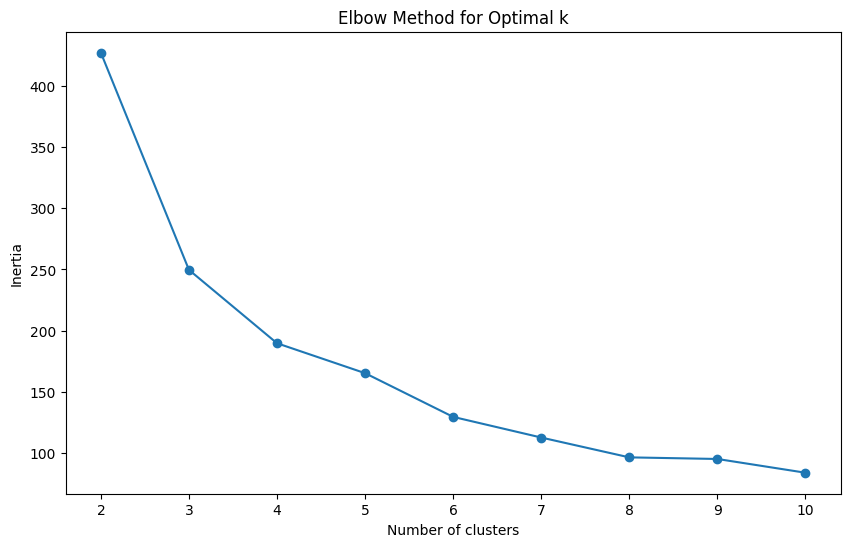

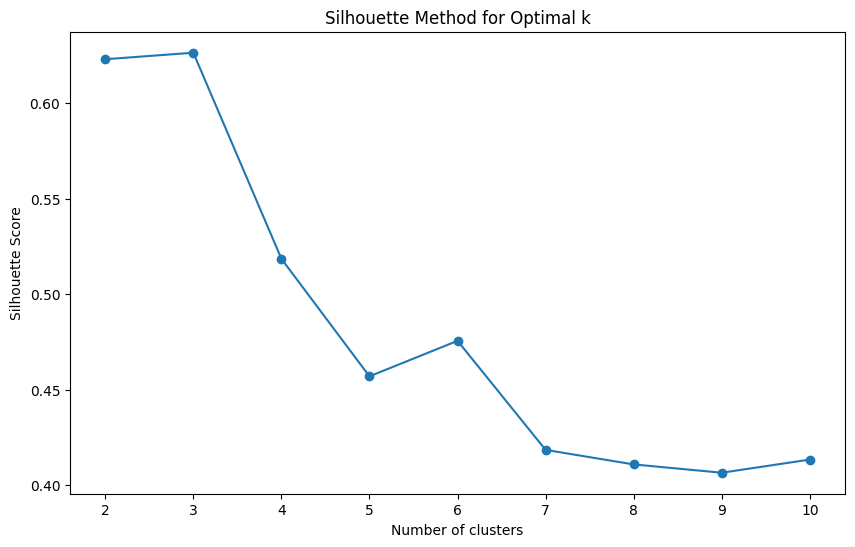

In [166]:
# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(2,11), df_clusters["inertia"], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(2,11)) 
plt.show()

# Plotting the Silhouette graph
plt.figure(figsize=(10, 6))
plt.plot(range(2,11), df_clusters["silhouette"], marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,11)) 
plt.show()

## **Results**

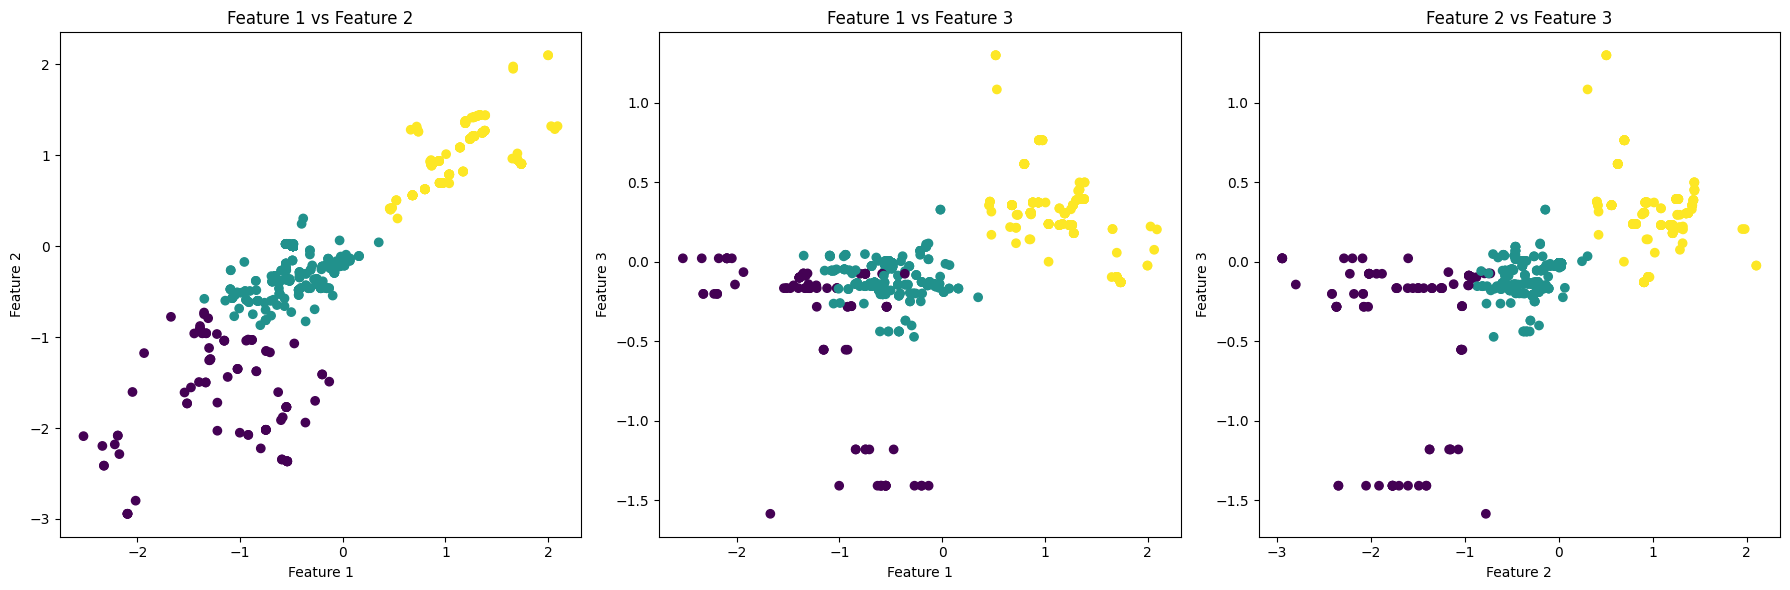

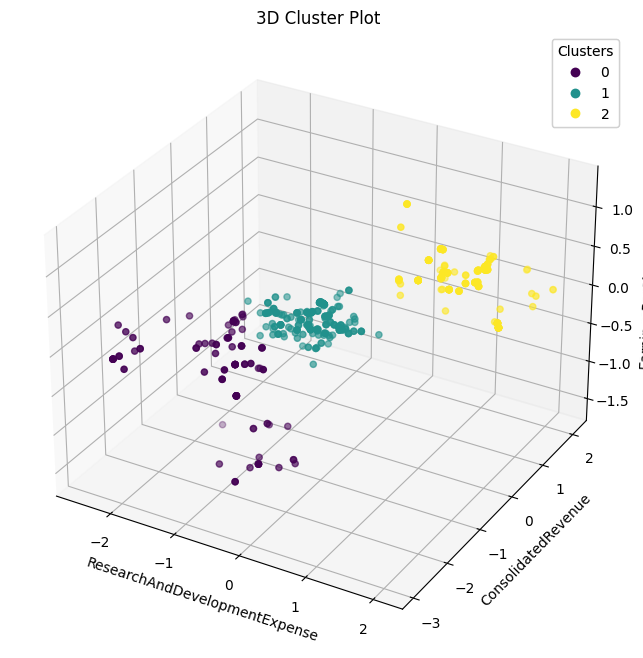

In [6]:
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=3, random_state=50, n_init="auto", init="k-means++")
kmeans.fit(X)
labels = kmeans.labels_

# 2D Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

pairs = [(0, 1), (0, 2), (1, 2)]
titles = ['Feature 1 vs Feature 2', 'Feature 1 vs Feature 3', 'Feature 2 vs Feature 3']

for i, (x, y) in enumerate(pairs):
    axes[i].scatter(X[:, x], X[:, y], c=labels, cmap='viridis', marker='o')
    axes[i].set_xlabel(f'Feature {x + 1}')
    axes[i].set_ylabel(f'Feature {y + 1}')
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, marker='o')
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.set_title('3D Cluster Plot')
ax.set_xlabel('ResearchAndDevelopmentExpense')
ax.set_ylabel('ConsolidatedRevenue')
ax.set_zlabel('EarningsPerShareBasic')

plt.show()


# **DBSCAN**

## **Hyperparameter Tuning**

In [7]:
from sklearn.cluster import DBSCAN
import seaborn as sns

eps_range = np.arange(.1, .5, .05)
min_samples_range = range(3, 20)
best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:                        # greater than 1 cluster
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(best_params)
print(best_score)

{'eps': 0.40000000000000013, 'min_samples': 18}
0.603491924773842


## **Results**

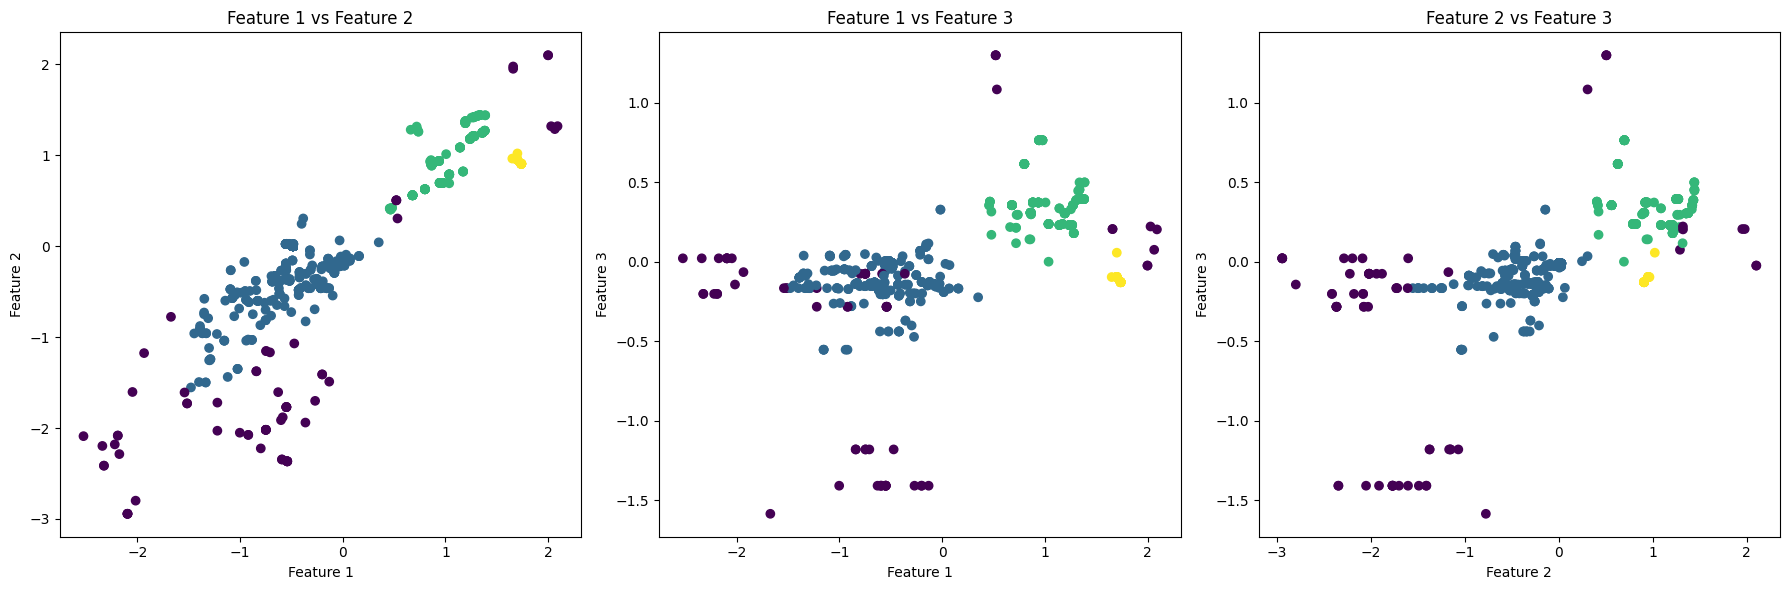

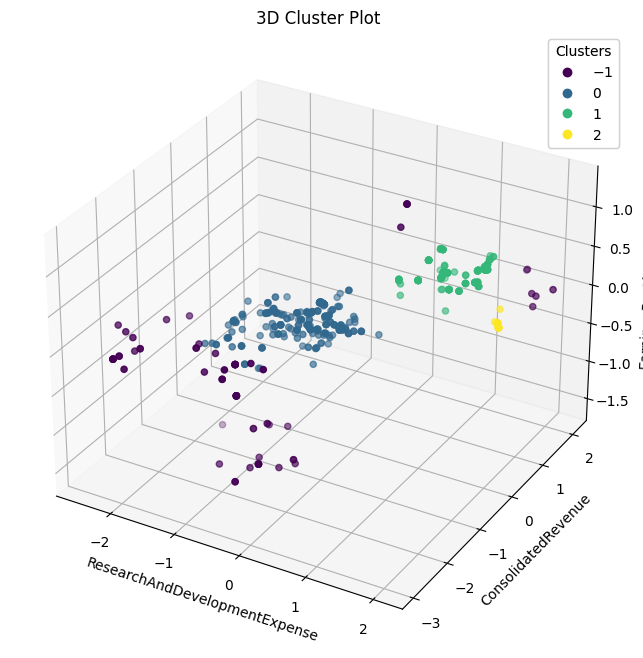

In [8]:
dbscan = DBSCAN(eps= best_params['eps'], min_samples= best_params['min_samples'])
labels = dbscan.fit_predict(X)

# 2D Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

pairs = [(0, 1), (0, 2), (1, 2)]
titles = ['Feature 1 vs Feature 2', 'Feature 1 vs Feature 3', 'Feature 2 vs Feature 3']

for i, (x, y) in enumerate(pairs):
    axes[i].scatter(X[:, x], X[:, y], c=labels, cmap='viridis', marker='o')
    axes[i].set_xlabel(f'Feature {x + 1}')
    axes[i].set_ylabel(f'Feature {y + 1}')
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, marker='o')
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.set_title('3D Cluster Plot')
ax.set_xlabel('ResearchAndDevelopmentExpense')
ax.set_ylabel('ConsolidatedRevenue')
ax.set_zlabel('EarningsPerShareBasic')

plt.show()


# **Hierarchical Clustering**

## **Hyperparameter Tuning**

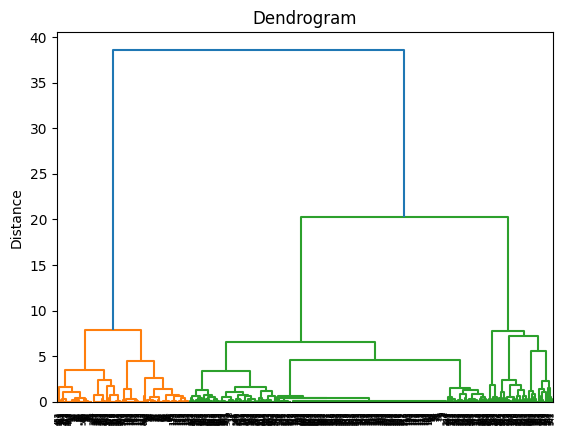

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Linkage matrix
dgram = linkage(X, method='ward')

# Plotting dendrogram
dendrogram(dgram)

plt.title("Dendrogram")
plt.ylabel('Distance')
plt.show()


## **Results**

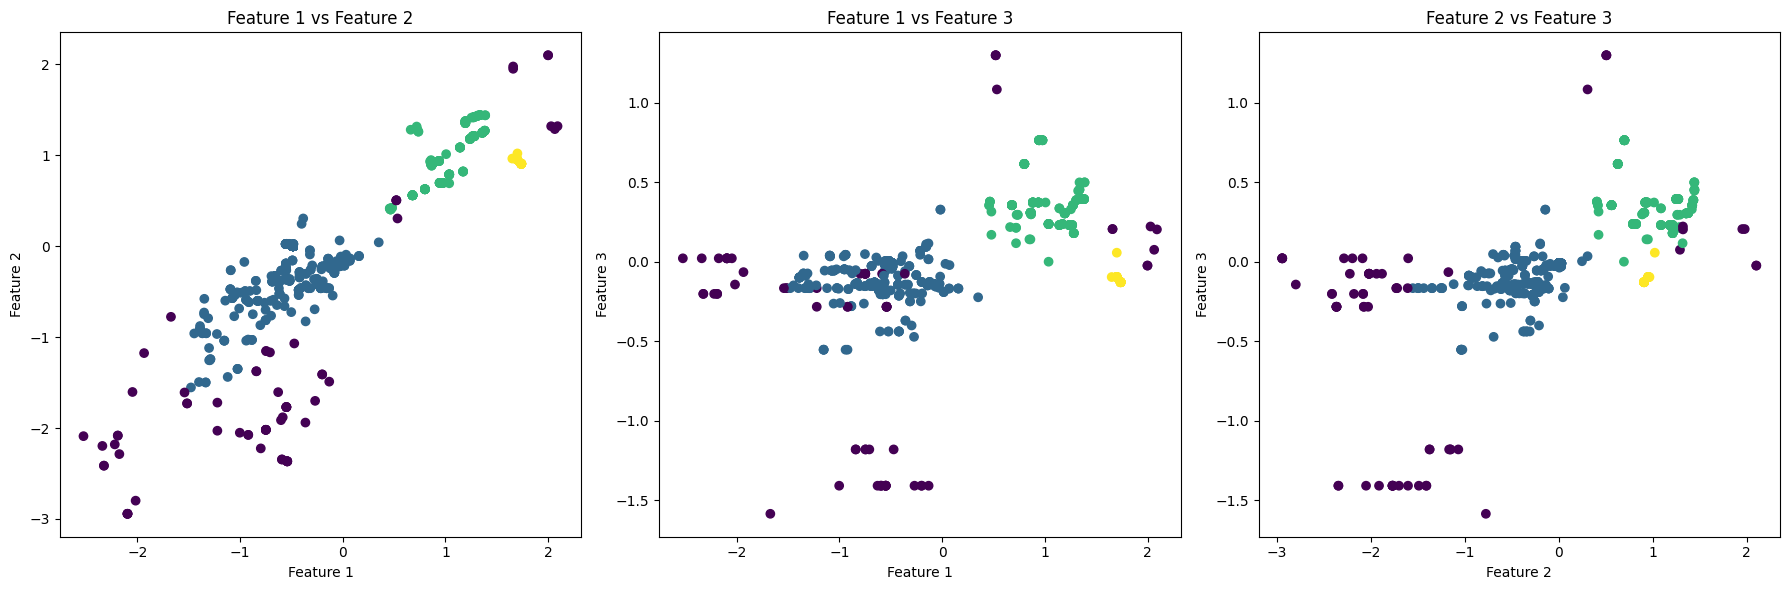

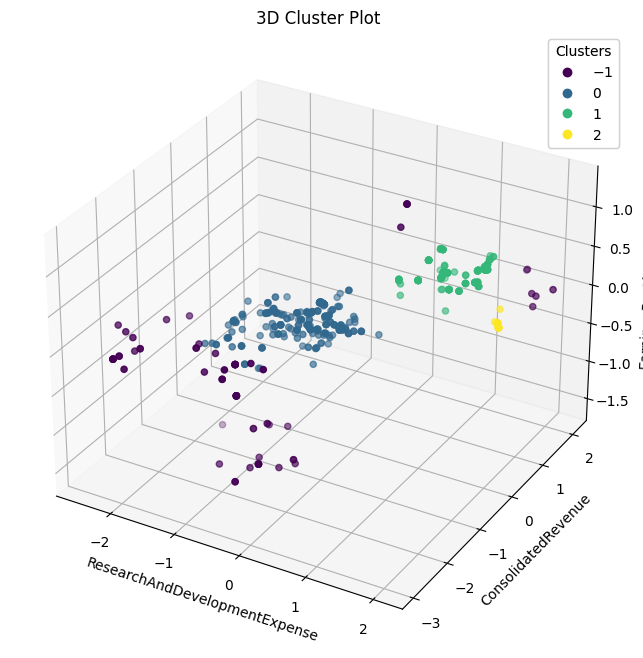

In [10]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = clustering.fit_predict(X)

dbscan = DBSCAN(eps= best_params['eps'], min_samples= best_params['min_samples'])
labels = dbscan.fit_predict(X)

# 2D Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

pairs = [(0, 1), (0, 2), (1, 2)]
titles = ['Feature 1 vs Feature 2', 'Feature 1 vs Feature 3', 'Feature 2 vs Feature 3']

for i, (x, y) in enumerate(pairs):
    axes[i].scatter(X[:, x], X[:, y], c=labels, cmap='viridis', marker='o')
    axes[i].set_xlabel(f'Feature {x + 1}')
    axes[i].set_ylabel(f'Feature {y + 1}')
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, marker='o')
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.set_title('3D Cluster Plot')
ax.set_xlabel('ResearchAndDevelopmentExpense')
ax.set_ylabel('ConsolidatedRevenue')
ax.set_zlabel('EarningsPerShareBasic')

plt.show()


# **Conclusion**

## **Results**

### **K-Means Clustering**
K-Means clustering effectively segmented companies in the SEC-FDA dataset based on Research and Development Expense, Consolidated Revenue, and Earnings Per Share Basic. The optimal three clusters identified via the Elbow method showed distinct financial profiles. The silhouette score of 0.626237 indicated a reasonably good separation between clusters, making K-Means a reliable method for this analysis.

### **DBSCAN**
DBSCAN's performance, with a silhouette score of 0.5967673039223855, was slightly lower compared to K-Means but still significant. It excelled in identifying natural groupings and outliers in the dataset, particularly effective in clustering companies with extreme financial values. This method provided a different perspective, especially in understanding the density-based clustering of financial data.

### **Hierarchical Clustering**
Contrary to expectations, Hierarchical clustering did not provide particularly insightful results for this dataset. While it offered a visual representation of data through dendrograms, it did not significantly enhance the understanding of the financial data relationships compared to the other methods.

### **Comparison of Clustering Methods**
K-Means, with its higher silhouette score, demonstrated better cluster definition and ease of interpretation. It was particularly suited for this financial dataset, providing clear and meaningful segmentation. DBSCAN's flexibility was notable, especially in handling outliers and diverse data points. However, its slightly lower silhouette score suggested less distinct clustering compared to K-Means. Hierarchical clustering, while providing a unique approach, did not yield particularly insightful results for this specific dataset.

## **Synthesis + Conclusions**

The clustering analysis of the SEC-FDA dataset shows 3 groupings of profiles for companies in the biopharmaceutical industry. This suggests a link between financial health, particularly in R&D investment, revenues, and earnings, and the types of FDA approvals a company might receive (which advisory committee), and I will examine this in more detail in my decision trees.

The analysis offered insight into the relationship between key financial indicators and FDA approval trends. The ability of K-Means and DBSCAN to cluster companies based on financial health indicators like R&D expense, revenue, and earnings per share can be instrumental in predicting FDA approval types and guiding investment decisions in the biopharmaceutical sector, but they didn't show any specific notable trends or patterns in the data.

This analysis demonstrates the value of clustering techniques in extracting meaningful insights from financial and FDA approval data. K-Means, with its higher silhouette score, emerged as the most effective method, providing clear and interpretable clusters. DBSCAN offered a valuable alternative perspective, particularly in handling outliers and complex data structures. Hierarchical clustering, while not as insightful for this dataset, still contributed to a comprehensive understanding of clustering methodologies.